In [1]:
import sys; sys.path.append('../')
import warnings
warnings.filterwarnings('ignore')
import pickle

from glob import glob
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt

In [2]:
plt.figure(figsize=(20,30))
res_paths = glob('../model_selection/results/*results.pickle')
n_cols_plots = 3
n_rows_plots = (len(res_paths) // n_cols_plots) + 1

all_results = []

for i, path in enumerate(res_paths):
    path = Path(path)
    with open(path, 'rb') as fh:
        results, *_ = pickle.load(fh)
        
    results = pd.DataFrame(results)
    all_results.append(results)
    
    plt.subplot(n_rows_plots, n_cols_plots, i + 1)
    x = list(range(len(results)))
    plt.errorbar(x, results.mean_train_score, results.std_train_score, label='train')
    plt.errorbar(x, results.mean_test_score, results.std_test_score, label='test')
    plt.legend()
    plt.title(path.name)

<Figure size 1440x2160 with 0 Axes>

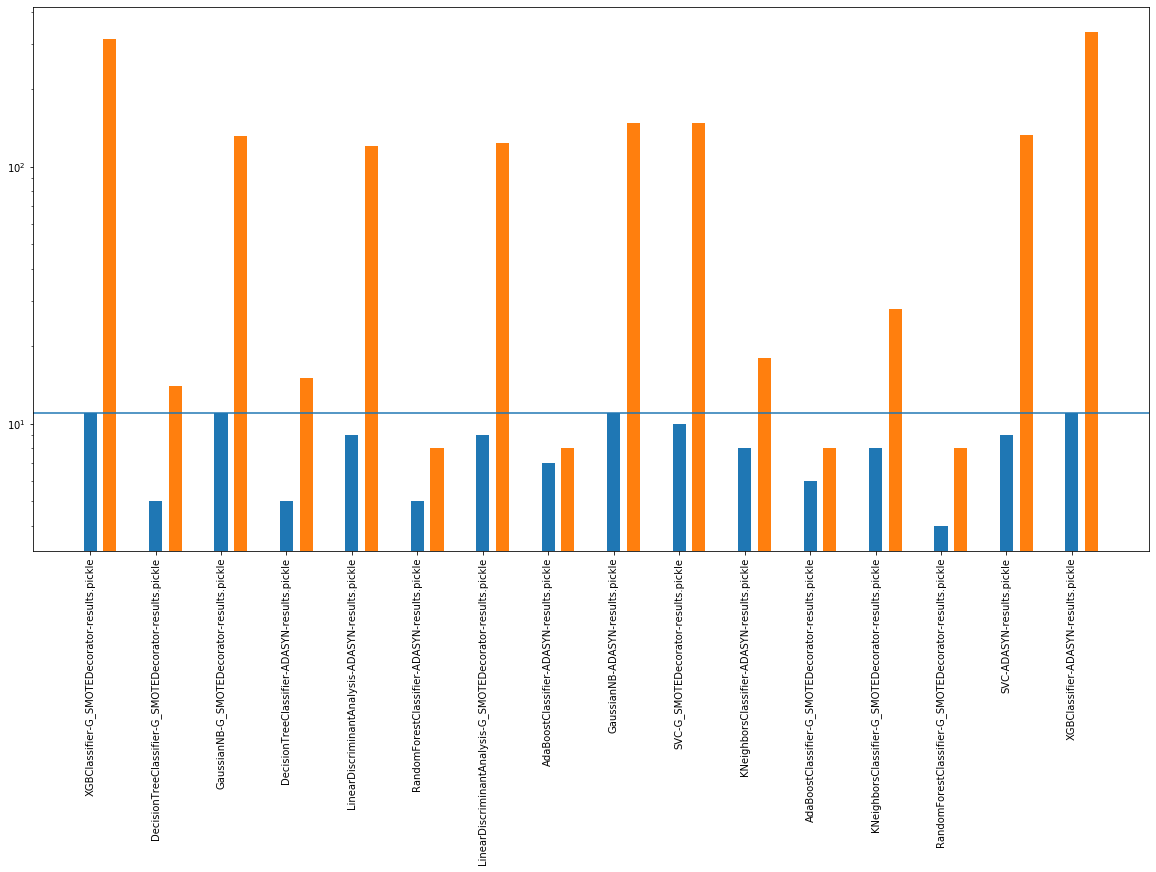

In [4]:
res_paths = glob('../experiments/feature_selection/results/*-results.pickle')

n_cols_plots = 3
n_rows_plots = (len(res_paths) // n_cols_plots) + 1

tps, ts, gts, labels = [], [], [], []
for i, path in enumerate(res_paths):
    path = Path(path)
    with open(path, 'rb') as fh:
        _, y_true, y_pred = pickle.load(fh)
    tps.append(sum(y_true & y_pred))
    ts.append(sum(y_pred))
    gts.append(sum(y_true))
    labels.append(path.name)

plt.figure(figsize=(20,10))
x = np.arange(len(tps))

plt.bar(x, tps, width=0.2)
plt.bar(x + 0.3, ts, width=0.2)

plt.xticks(x, labels, rotation=90)
plt.yscale('log')
plt.axhline(gts[0])

In [5]:
res_paths = glob('../experiments/feature_selection/results/*.pickle')

for i, path in enumerate(res_paths):
    path = Path(path)
    if 'results' in path.name: continue
    with open(path, 'rb') as fh:
        conf = pickle.load(fh)
    print(conf)

{'FEATURE_SELECTION__n_features_to_select': 37}
{'FEATURE_SELECTION__n_features_to_select': 18}
{'FEATURE_SELECTION__n_features_to_select': 24}
{'FEATURE_SELECTION__n_features_to_select': 8}
{'FEATURE_SELECTION__n_features_to_select': 25}
{'FEATURE_SELECTION__n_features_to_select': 6}
{'FEATURE_SELECTION__n_features_to_select': 34}
{'FEATURE_SELECTION__n_features_to_select': 28}
{'FEATURE_SELECTION__n_features_to_select': 26}
{'FEATURE_SELECTION__n_features_to_select': 10}
{'FEATURE_SELECTION__n_features_to_select': 17}
{'FEATURE_SELECTION__n_features_to_select': 28}
{'FEATURE_SELECTION__n_features_to_select': 38}
{'FEATURE_SELECTION__n_features_to_select': 33}
{'FEATURE_SELECTION__n_features_to_select': 34}
{'FEATURE_SELECTION__n_features_to_select': 8}


In [6]:
res_paths = glob('../experiments/feature_selection/results/*.pickle')
test_scores = {}

for i, path in enumerate(res_paths):
    path = Path(path)
    if 'results' in path.name: continue
    with open(path, 'rb') as fh:
        conf = pickle.load(fh)
    with open(str(path).rsplit('.', 1)[0] + '-results.pickle', 'rb') as fh:
        results, *_ = pickle.load(fh)
    
    results = pd.DataFrame(results)
    scores = results[results.params == conf].filter(regex='split\d_test*').values
    if len(scores) != 0:
        test_scores[path.name.rsplit('.', 1)[0]] = scores[0]
    else:
        test_scores[path.name.rsplit('.', 1)[0]] =\
            results[results.params.apply(lambda d: d.get('AdaBoostClassifier__n_estimators', None)) == conf['AdaBoostClassifier__n_estimators']]\
                .filter(regex='split\d_test*').values[0]
test_scores = list(test_scores.items())
test_scores = sorted(test_scores, key = lambda l: l[1].mean(), reverse=True)

In [7]:
from scipy.stats import friedmanchisquare

for n1, s1 in test_scores:
    print(n1)
    for n2, s2 in test_scores:
        if n1 != n2:
            print(n2, end='->')
            measurements = np.column_stack((s1, s2))
            print(*friedmanchisquare(*measurements))
    print('\n\n')

AdaBoostClassifier-ADASYN
SVC-ADASYN->6.0 0.1991482734714558
KNeighborsClassifier-G_SMOTEDecorator->6.871794871794875 0.1428203849478163
AdaBoostClassifier-G_SMOTEDecorator->7.600000000000001 0.1073797049095948
KNeighborsClassifier-ADASYN->7.600000000000001 0.1073797049095948
LinearDiscriminantAnalysis-G_SMOTEDecorator->2.8000000000000043 0.5918327134598548
SVC-G_SMOTEDecorator->2.8000000000000043 0.5918327134598548
LinearDiscriminantAnalysis-ADASYN->6.0 0.1991482734714558
XGBClassifier-ADASYN->4.800000000000004 0.308441041184002
XGBClassifier-G_SMOTEDecorator->4.400000000000006 0.35457010675946776
GaussianNB-G_SMOTEDecorator->4.800000000000004 0.308441041184002
GaussianNB-ADASYN->6.800000000000004 0.14684238782543443
RandomForestClassifier-ADASYN->7.200000000000003 0.12568912325754564
RandomForestClassifier-G_SMOTEDecorator->7.8974358974359005 0.09540832826692774
DecisionTreeClassifier-G_SMOTEDecorator->6.0 0.1991482734714558
DecisionTreeClassifier-ADASYN->6.0 0.1991482734714558



SV